In [3]:
# MODULE IMPORT
#import GP_functions1
from GP_functions1 import GP_train, GP_predict

#import others
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import time
import GPy
from IPython.display import display
import three_desc_model as exponential_new
from cutoffs import Polynomial
GPy.plotting.change_plotting_library('matplotlib')


In [4]:
# TRAIN MODEL and assign to predicting class
name = "all_dataset.csv"
model = GP_train() # create training class
m = model.train_model() # trains model on "all_dataset.csv"

# CREATE PREDICTING CLASS from which attenuation predictions are made
predict_class = GP_predict(m) # create predicting class

In [30]:
# DATA IMPORT (testing script only)
# wind data import
wind_data = genfromtxt('Directiondata.csv', delimiter=',')
wind_data = np.delete(wind_data, 0, 0)
print(wind_data)

# farm layout generation
turbine_coordinates  = np.array([[0,0], [400,0], [0,-250]])
print(turbine_coordinates)


[[  0.     8.89   2.09   4.82]
 [ 30.     9.27   2.13   4.06]
 [ 60.     8.23   2.29   3.59]
 [ 90.     9.78   2.3    5.27]
 [120.    11.64   2.67   9.12]
 [150.    11.03   2.45   6.97]
 [180.    11.5    2.51   9.17]
 [210.    11.92   2.4   11.84]
 [240.    11.49   2.35  12.41]
 [270.    11.08   2.27  11.34]
 [300.    11.34   2.24  11.7 ]
 [330.    10.79   2.19   9.69]
 [360.     8.89   2.09   4.82]]
[[   0    0]
 [ 400    0]
 [   0 -250]]


(-750.0, 500.0)

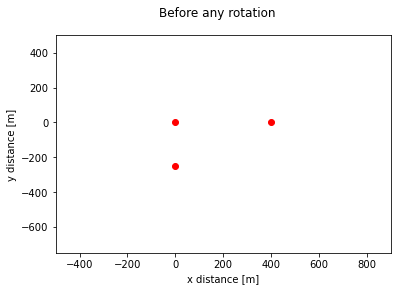

In [31]:
# PLOT INITIAL FARM LAYOUT (testing script only)
fig, (ax1) = plt.subplots(1)
fig.suptitle('Before any rotation')
ax1.scatter(turbine_coordinates[:,0],turbine_coordinates[:,1],c='red') # Prints turbine positions in red
ax1.set_xlabel('x distance [m]') # x axis label
ax1.set_ylabel('y distance [m]') # y axis label
ax1.set_xlim([min(turbine_coordinates[:,0])-500, max(turbine_coordinates[:,0])+500]) #x limits
ax1.set_ylim([min(turbine_coordinates[:,1])-500, max(turbine_coordinates[:,1])+500]) #y limits 

In [7]:
# FUNCTION: SIMPLE ROTATE
def rotate(angle,coords):
    angle = np.pi*angle/180.
    rotcoordx = []
    rotcoordy = []
    for coord in coords:
        rotcoordx+=[coord[0]*np.cos(angle)-coord[1]*np.sin(angle)]
        rotcoordy+=[coord[0]*np.sin(angle)+coord[1]*np.cos(angle)]
    rotcoords=[rotcoordx,rotcoordy]
    rotcoords=np.array(rotcoords).T
    return rotcoords

In [28]:
## FUNCTION: WIND SPEED REDUCTION (WSR) 
## description: returns a matrix of wind attenuation with nturb turbine rows, ndir direction columns
def windspeedreduction(positionlist,directions,g_model):
    ndir = int(np.size(directions))
    nturb = int(np.size(positionlist)/2)
    for i in range(0,ndir):
        angle_to_rotate = 90 + directions[i];
        print(f'angle_to_rotate = {angle_to_rotate}')
        westerly_pos_list = rotate(angle_to_rotate,positionlist) # rotate position list for westerly wind
        att_vector = g_model.predict(westerly_pos_list, nturb) # vector of attenuations (from GP_functions module)
        att_vector = att_vector.reshape(nturb,)
        if i == 0:
            total_att = att_vector
        total_att = np.vstack((total_att,att_vector))
        
        ## PLOT ROTATED FARM (for verification, delete later)
        fig, (ax1) = plt.subplots(1)
        fig.suptitle(f'Wind farm plot (wind angle: {directions[i]} degrees)(index = {i})')
        ax1.scatter(westerly_pos_list[:,0],westerly_pos_list[:,1],c='red') # Prints turbine positions in red
        ax1.set_xlabel('x distance [m]') # x axis label
        ax1.set_ylabel('y distance [m]') # y axis label
        ax1.set_xlim([min(westerly_pos_list[:,0])-500, max(westerly_pos_list[:,0])+500]) #x limits
        ax1.set_ylim([min(westerly_pos_list[:,1])-500, max(westerly_pos_list[:,1])+500]) #y limits
    
    total_att = total_att/8 ## Get attenuation as a fraction compared to the assumed base wind speed in gaussian model of 8 m/s
    print(total_att)
    return total_att

In [32]:
## IMPORTING WIND DIRECTION DATA
## north = 0 degrees
direction_data = pd.read_csv('Directiondata.csv')
wind_directions = direction_data['Angle']
wind_directions = pd.DataFrame(wind_directions).to_numpy()
wind_directions = np.transpose(wind_directions)

# GET WIND DIRECTIONS AS STANDALONE VECTOR
ndir = int(np.size(wind_data)/4)
directions = np.ones((ndir))
for i in range(0, ndir):
    directions[i] = wind_data[i][0]
directions = np.transpose(directions)
print(f'directions = {directions}')
directions

directions = [  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 330. 360.]


array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
       330., 360.])

angle_to_rotate = 90.0
angle_to_rotate = 120.0
angle_to_rotate = 150.0
angle_to_rotate = 180.0
angle_to_rotate = 210.0
angle_to_rotate = 240.0
angle_to_rotate = 270.0
angle_to_rotate = 300.0
angle_to_rotate = 330.0
angle_to_rotate = 360.0
angle_to_rotate = 390.0
angle_to_rotate = 420.0
angle_to_rotate = 450.0
[[0.92477772 0.92477772 0.61039652]
 [0.92477772 0.92477772 0.61039652]
 [0.92477772 0.92477772 0.88866232]
 [0.92477772 0.92477772 0.88866232]
 [0.61039652 0.92477772 0.92477772]
 [0.92477772 0.92477772 0.92477772]
 [0.92477772 0.92477772 0.92477772]
 [0.61039652 0.92477772 0.92477772]
 [0.92477772 0.88866232 0.92477772]
 [0.92477772 0.88866232 0.92477772]
 [0.92477772 0.61039652 0.92477772]
 [0.92477772 0.92477772 0.92477772]
 [0.92477772 0.92477772 0.92477772]
 [0.92477772 0.92477772 0.61039652]]


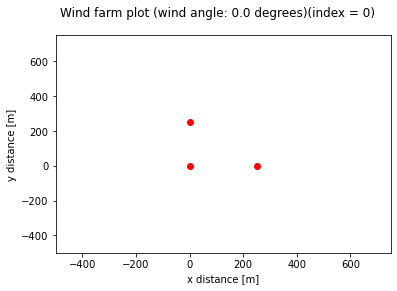

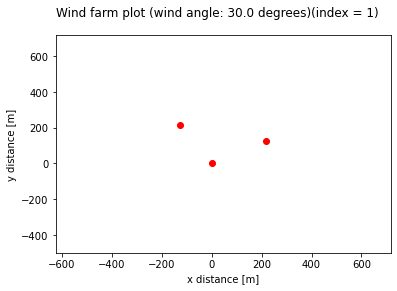

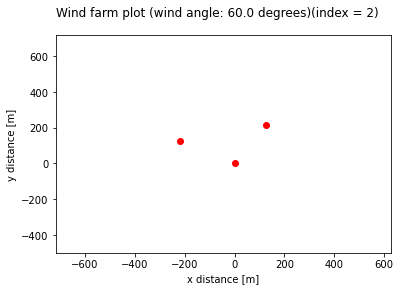

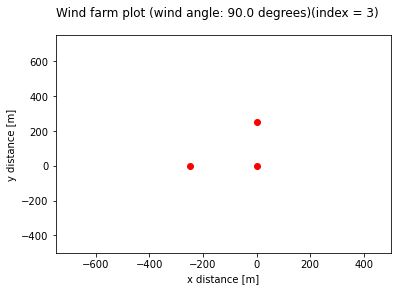

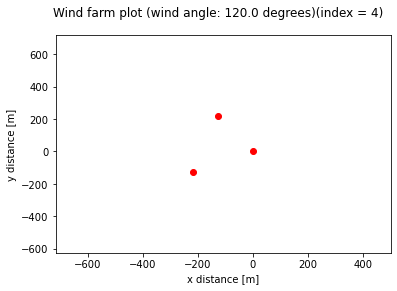

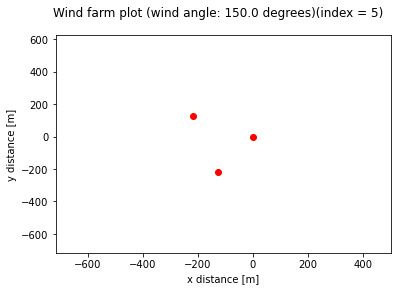

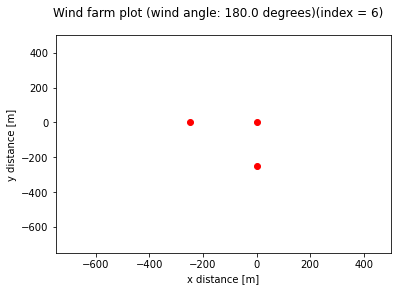

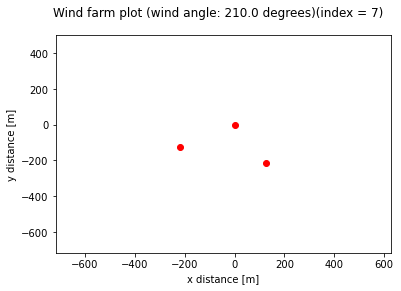

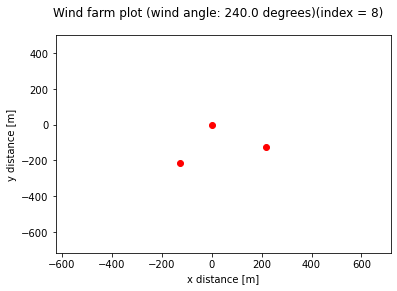

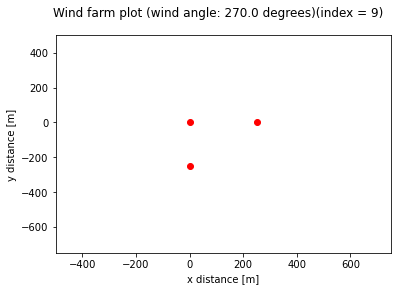

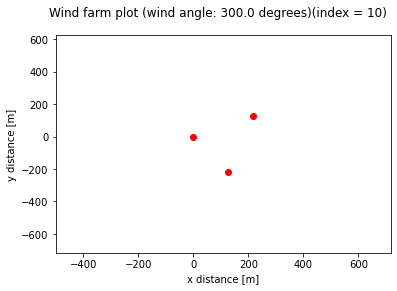

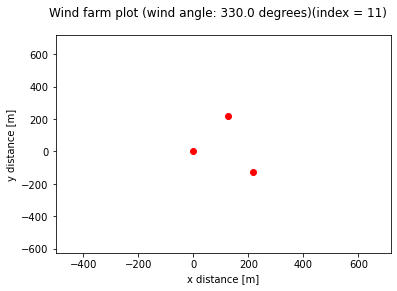

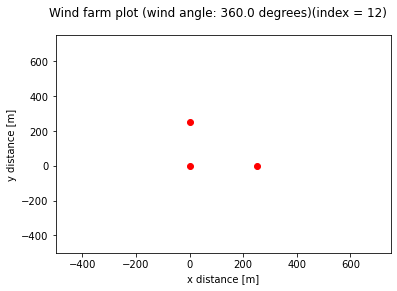

In [29]:
# USE WSR TO GENERATE ATTENUATION MATRIX
total_att = windspeedreduction(turbine_coordinates, directions, predict_class)

In [ ]:
# WIND ATTENUATION SANITY CHECK
nturb = int(np.size(turbine_coordinates)/2)
attenuation_matrix = predict_class.predict(turbine_coordinates, nturb)

# plot rotated farm (for verification, delete later)
fig, (ax1) = plt.subplots(1)
ax1.scatter(turbine_coordinates[:,0],turbine_coordinates[:,1],c='red') # Prints turbine positions in red
ax1.set_xlabel('x distance [m]') # x axis label
ax1.set_ylabel('y distance [m]') # y axis label
ax1.set_xlim([min(turbine_coordinates[:,0])-500, max(turbine_coordinates[:,0])+500]) #x limits
ax1.set_ylim([min(turbine_coordinates[:,1])-500, max(turbine_coordinates[:,1])+500]) #y limits